# Visualizing Barcelona rents of 2021

# Introduction

The rent prices in Barcelona are a nightmare for young people who want to rent an apartment in the city, rather than have to leave to the surrounders, in order to enjoy the city but being able to afford it. Hence, the study of the rent per month and per square meter for different districts and neighborhoods is crutial in order to identify which zones are under more pressure and requires taking action. Here, we will study the rent per month and per square meter of the different zones of Barcelona during 2021.

# Importing and preparing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style="whitegrid")

In [2]:
data=pd.read_csv('preu lloguer per trimestre i barri.csv')
df=data.copy()
df.rename(columns = {'Any':'Year', 'Trimestre':'Term', 'Codi_Districte':'District_code','Nom_Districte':'District_name', 'Codi_Barri':'Neighborhood_code', 'Nom_Barri':'Neighborhood_name', 'Lloguer_mitja':'Avg_rent_type','Preu':'Price'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               584 non-null    int64 
 1   Term               584 non-null    int64 
 2   District_code      584 non-null    int64 
 3   District_name      584 non-null    object
 4   Neighborhood_code  584 non-null    int64 
 5   Neighborhood_name  584 non-null    object
 6   Avg_rent_type      584 non-null    object
 7   Price              584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [3]:
df.sample(10)

,Year,Term,District_code,District_name,Neighborhood_code,Neighborhood_name,Avg_rent_type,Price
406,2021,3,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
190,2021,2,8,Nou Barris,45,Porta,Lloguer mitjà mensual (Euros/mes),698.5
162,2021,2,3,Sants-Montjuïc,17,Sants - Badal,Lloguer mitjà mensual (Euros/mes),778.1
490,2021,4,8,Nou Barris,53,la Trinitat Nova,Lloguer mitjà mensual (Euros/mes),557.0
368,2021,3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.4
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
227,2021,2,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.2
465,2021,4,6,Gràcia,28,Vallcarca i els Penitents,Lloguer mitjà mensual (Euros/mes),920.1
48,2021,1,8,Nou Barris,49,Canyelles,Lloguer mitjà mensual (Euros/mes),762.5
33,2021,1,7,Horta-Guinardó,34,Can Baró,Lloguer mitjà mensual (Euros/mes),741.1


We transform the *Price* column to a numeric form:

In [4]:
df['Price']=pd.to_numeric(df['Price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               584 non-null    int64  
 1   Term               584 non-null    int64  
 2   District_code      584 non-null    int64  
 3   District_name      584 non-null    object 
 4   Neighborhood_code  584 non-null    int64  
 5   Neighborhood_name  584 non-null    object 
 6   Avg_rent_type      584 non-null    object 
 7   Price              540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [5]:
#Variables:
df_permonth=df[df.Avg_rent_type=='Lloguer mitjà mensual (Euros/mes)'] #Rent per month
df_persurface=df[df.Avg_rent_type=='Lloguer mitjà per superfície (Euros/m2 mes)'] #Rent per square meter
nan_permonth=df_permonth[df_permonth['Price'].isnull()] #Nan of the df_permonth
nan_persurface=df_persurface[df_persurface['Price'].isnull()] #Nan of the df_persurface

In [6]:
print(nan_permonth.groupby(by=['District_code'])['Neighborhood_code'].count())
print(df_permonth.groupby(by=['District_code'])['Neighborhood_code'].count())

District_code
3     4
7     4
8    12
9     2
Name: Neighborhood_code, dtype: int64
District_code
1     16
2     24
3     32
4     12
5     24
6     20
7     44
8     52
9     28
10    40
Name: Neighborhood_code, dtype: int64


We observe that the numbers of Nan values per district do not represent more than 10% except with the district 8 which represents about 25% of the data. Therefore, we may replace the Nan values with the mean values of the district to which they belong to, but bearing in mind that the results of District 8, may not be fully accurate: 

In [7]:
mean_values_district=df_permonth.groupby(by=['District_code']).mean()['Price'].round(1)
mean_values_district

District_code
1      858.9
2     1000.5
3      798.9
4     1214.1
5     1271.2
6      877.3
7      765.0
8      664.3
9      721.2
10     916.4
Name: Price, dtype: float64

In [8]:
df_permonth.groupby(by=['District_code']).std()['Price'].round(1)

District_code
1      70.8
2     105.2
3      39.0
4     359.7
5     190.9
6      65.8
7      61.5
8      71.1
9      94.4
10    178.8
Name: Price, dtype: float64

In [9]:
for i in nan_permonth.index:
    value_to_replace=mean_values_district[nan_permonth.loc[i]['District_code']]
    df.loc[i,'Price'] = value_to_replace

In [10]:
#Verification:
print(df.loc[493]['Price'])
print(df.loc[11]['Price'])

664.3
798.9


In [11]:
nan_persurface

,Year,Term,District_code,District_name,Neighborhood_code,Neighborhood_name,Avg_rent_type,Price
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN
128,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
130,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),NaN
230,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
260,2021,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
272,2021,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [12]:
mean_values_districtpersurface=df_persurface.groupby(by=['District_code']).mean()['Price'].round(1)
mean_values_districtpersurface

District_code
1     13.8
2     13.3
3     12.7
4     14.0
5     15.0
6     13.4
7     12.0
8     10.9
9     11.2
10    13.4
Name: Price, dtype: float64

In [13]:
for i in nan_persurface.index:
    value_to_replace=mean_values_districtpersurface[nan_persurface.loc[i]['District_code']]
    df.loc[i,'Price'] = value_to_replace

In [14]:
#Verification:
print(df.loc[406]['Price'])
print(df.loc[274]['Price'])

12.0
10.9


In [15]:
#Variables
df_permonth=df[df.Avg_rent_type=='Lloguer mitjà mensual (Euros/mes)']
df_persurface=df[df.Avg_rent_type=='Lloguer mitjà per superfície (Euros/m2 mes)']
nan_persurface=df_persurface[df_persurface['Price'].isnull()]
nan_permonth=df_permonth[df_permonth['Price'].isnull()]

In [16]:
df_permonth['Price'].isnull().value_counts()

False    292
Name: Price, dtype: int64

In [17]:
df_persurface['Price'].isnull().value_counts()

False    292
Name: Price, dtype: int64

Now, our data is ready. Let's have a look, for example to the statistics of the data per month:

In [18]:
df_permonth.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,292.0,2021.00,0.00,2021.0,2021.00,2021.00,2021.00,2021.0
Term,292.0,2.50,1.12,1.0,1.75,2.50,3.25,4.0
District_code,292.0,6.25,2.79,1.0,4.00,7.00,8.00,10.0
Neighborhood_code,292.0,37.00,21.11,1.0,19.00,37.00,55.00,73.0
Price,292.0,859.59,217.35,447.5,735.80,804.95,927.75,1816.5


We have 292 data,the price ranges between 447.5€ and 1816.5€. Each row has associated a district code (ranging from 1 to 10) and a Neighborhood code (ranging from 1 to 73).

# District distribution

First, let's have a look to the distribution of values that we have. We can do this using a treemap, as the one shown below. We observe that most of our data belongs to the districts 10,7 and 8, being the district 1 and 4 the less represented.

<AxesSubplot:title={'center':'Distribution of the districts counts'}, xlabel='District', ylabel='Counts'>

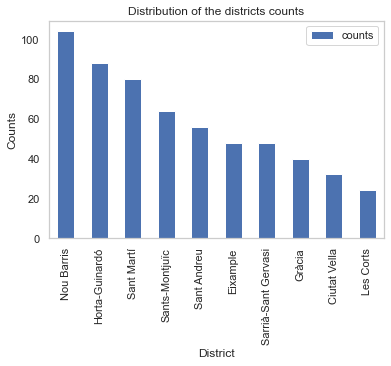

In [19]:
a=df['District_name'].value_counts()
a=df['District_name'].value_counts().rename_axis('unique_values').to_frame('counts')
a.plot(kind='bar', xlabel='District', ylabel='Counts', title='Distribution of the districts counts', grid=False)

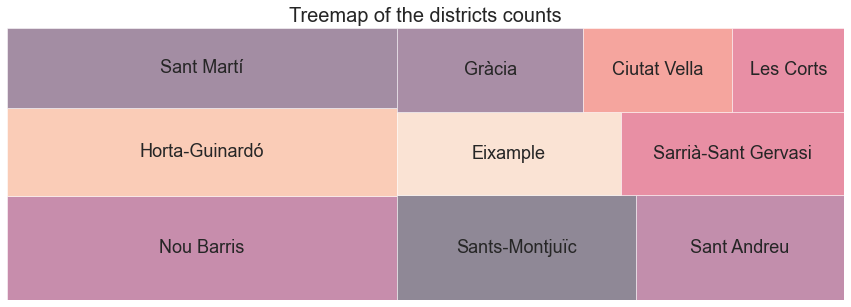

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
labels=df['District_name'].value_counts().sort_values(ascending=False).index
ax=squarify.plot(sizes=df['District_name'].value_counts(),  label=labels, alpha=.5,  text_kwargs={'fontsize': 18})
plt.axis('off')
plt.title('Treemap of the districts counts', fontsize = 20)
fig.savefig('Treemap.png',bbox_inches='tight')
plt.show()

# Price distribution

Let's hava a look now to the price distribution. 

In [21]:
df_permonth['Price'].describe().round(2)

count     292.00
mean      859.59
std       217.35
min       447.50
25%       735.80
50%       804.95
75%       927.75
max      1816.50
Name: Price, dtype: float64

From the table, we observe that the average rent per month is 859€, with a standard desviation of 217€, being the rent per month of 447€ and the maximum of 1816€. Note also that the rent per month  IQR is between 927.75€ and 735.80€.

In [22]:
df_persurface['Price'].describe().round(2)

count    292.00
mean      12.63
std        1.68
min        6.70
25%       11.50
50%       12.70
75%       13.52
max       18.00
Name: Price, dtype: float64

From the table, we observe that the mean price per square meter is 12.62 €/m$^2$, with a standard desviation of  1.68 €/m$^2$, being the minimum value  6.7 €/m$^2$ and the maximum  18 €/m$^2$. Note also that the Price IQR is comprised between  13.52 €/m$^2$ and 11.5 €/m$^2$.

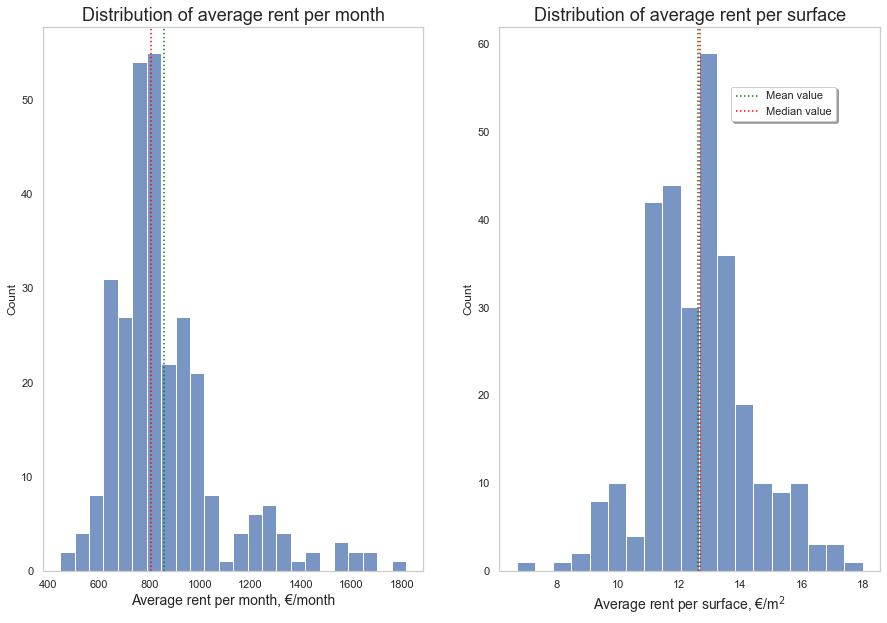

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].set_title('Distribution of average rent per month', fontsize=18)
axes[1].set_title('Distribution of average rent per surface', fontsize=18)
sns.histplot(ax=axes[0], data=df_permonth,x='Price')
axes[0].set_xlabel("Average rent per month, €/month", fontsize = 14)
axes[0].axvline(x=df_permonth.Price.mean(), color='green', linestyle=':', label='Mean value')
axes[0].axvline(x=df_permonth.Price.median(), color='red', linestyle=':', label='Median value')
axes[0].grid(False)
sns.histplot(ax=axes[1], data=df_persurface, x='Price')
axes[1].set_xlabel("Average rent per surface, €/m$^2$", fontsize = 14)
axes[1].axvline(x=df_persurface.Price.mean(), color='green', linestyle=':', label='Mean value')
axes[1].axvline(x=df_persurface.Price.median(), color='red', linestyle=':', label='Median value')
axes[1].grid(False)
plt.legend(loc='best',bbox_to_anchor=(0.9, 0.9), ncol=1, fancybox=True, shadow=True)

fig.savefig('Distribution_rent.png',bbox_inches='tight')
plt.show()

In the figure above, we have represented the distribution of the rent per month and the rent per square meter. We observe, as expected that most of the data is located around the mean value previouly found, which is represented with a dashed green line. Most of the monthly rents are concentrated between 600€/month and 1000 €/month while the rents per unit surface are concentrated between 11 €/m$^2$ and 14 €/m$^2$. Interestingly, in the rent per month distribution, there is a difference between the mean value (green line) and the median value(red line), suggesting that this distribution does not follow a normal distribution.

Let's have a look to the price distribution within different districts. 

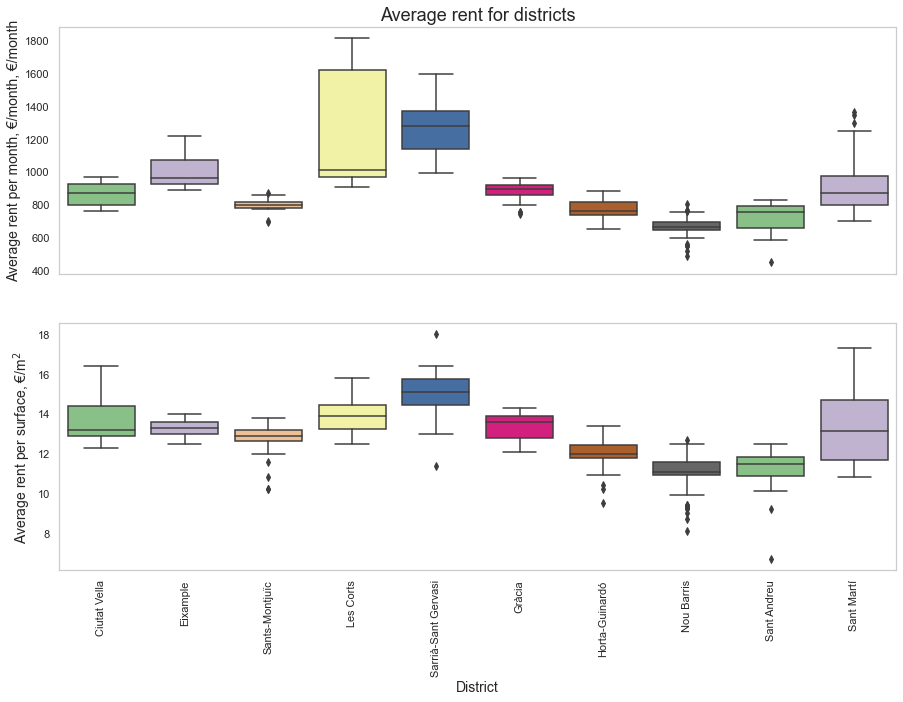

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
plt.xticks(rotation=90, ha='center')
axes[0].set_title('Average rent for districts', fontsize = 18)
sns.boxplot(ax=axes[0], data=df_permonth,x='District_name', y='Price', palette="Accent")
axes[0].set_ylabel("Average rent per month, €/month, €/month", fontsize = 14)
axes[0].set(xlabel=None,xticklabels=[])
sns.boxplot(ax=axes[1], data=df_persurface,x='District_name', y='Price', palette="Accent")
axes[1].set_ylabel("Average rent per surface, €/m$^2$", fontsize = 14)
axes[1].set_xlabel("District", fontsize = 14)
axes[0].grid(False)
axes[1].grid(False)
fig.savefig('Boxplot_district.png', bbox_inches='tight')
plt.show()

From the graphs, we conclude that in average, the rent per month and the rent per square meter are about 900 €/month and 13 €/m$^2$, respectively. This behaviour is broken however by the districts of *Les Corts* and *Sarria-Sant Gervasi* which show greater values, being the rent per month and the rent per square meter about 1200 €/month and 14 €/m$^2$, respectively.  

We may be curious about what is the price distribution for different neighborhood. This is shown in the following graphs:

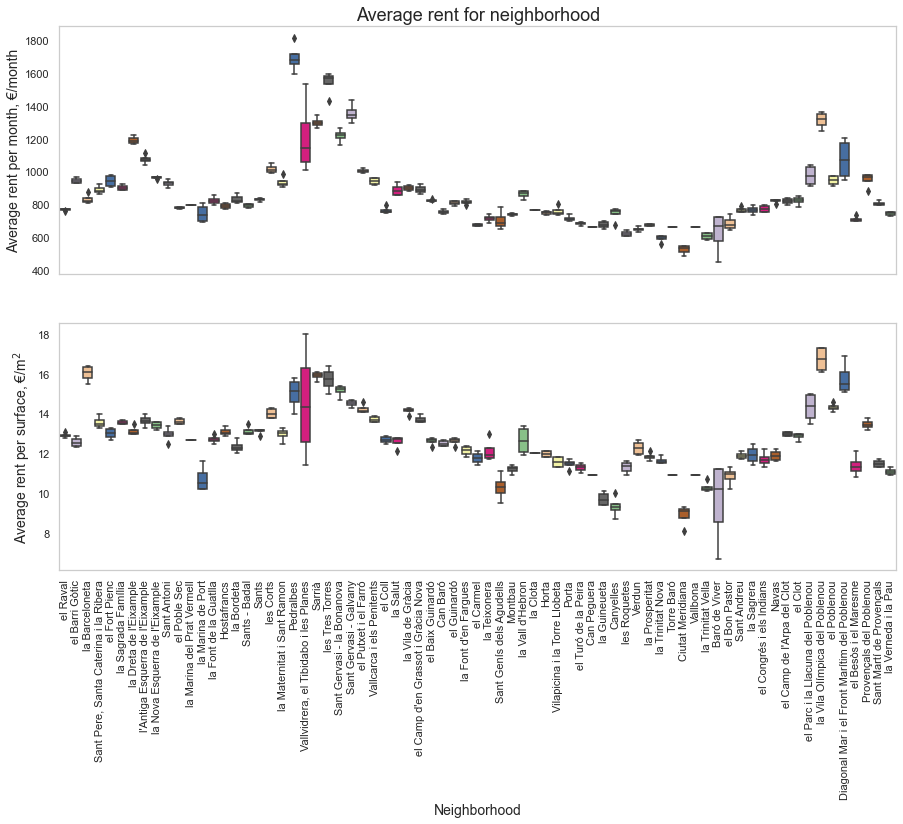

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title('Average rent for neighborhood', fontsize = 18)

sns.boxplot(ax=axes[0], data=df_permonth,x='Neighborhood_name', y='Price', palette="Accent")
axes[0].set_ylabel("Average rent per month, €/month", fontsize = 14)
axes[0].set(xlabel=None,xticklabels=[])
sns.boxplot(ax=axes[1], data=df_persurface,x='Neighborhood_name', y='Price', palette="Accent")
axes[1].set_ylabel("Average rent per surface, €/m$^2$", fontsize = 14)
axes[1].set_xlabel("Neighborhood", fontsize = 14)
plt.xticks(rotation=90, ha='center')
axes[0].grid(False)
axes[1].grid(False)
fig.savefig('Boxplot_neighborhood.png',bbox_inches='tight')
plt.show()

As in the previous graph, we observe that most of the neighborhood have a rent of 900 €/month and price of 13 €/m$^2$. Yet, there are some neighborhood which are clearly above this average such as *Sarria*, *Les tres torres*, *Sant Gervasi-La Bonanova* or *La Vila Olimpica del Poblenou*, reaching prices above the 1400€ per month and 16 €/m$^2$. It is interesting to stress the difference in price per month and the price per square meter in *La Barceloneta*, being the price per square meter of 16 €/m$^2$ but the rent per month of 800€, indicating that people is paying high prices for very small apartments. 

# Temporal price evolution

We will examine how the prices have evolved during 2021. Both graphs, show how the price per month and per square meter decreased during the second term but to recover during the rest of the year. If we decomposed the graph by district, we observe the same trend in most of the districts, with the exception of whose price per month decreases again in the fourth term. 

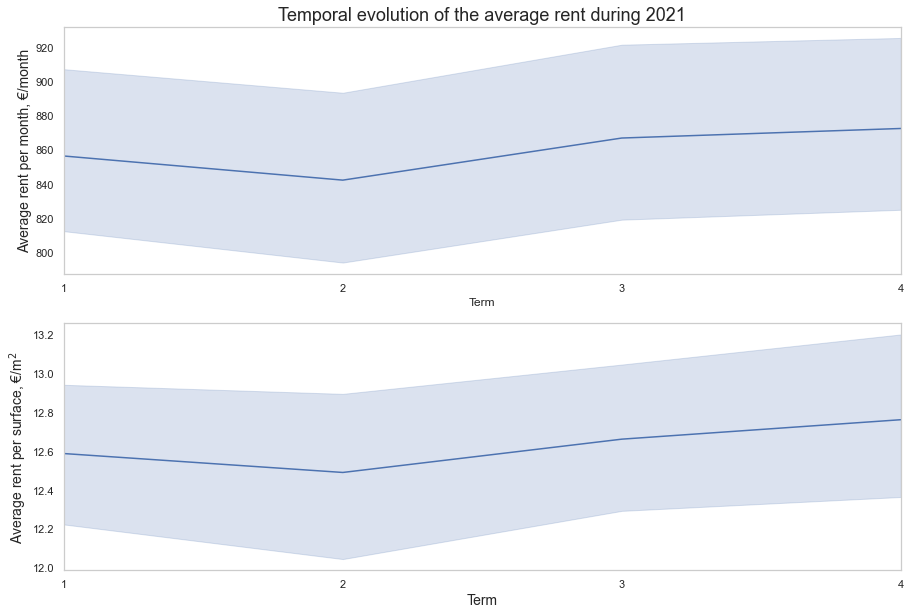

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.lineplot(data=df_persurface, x='Term', y='Price', ax=axes[1])
axes[1].set_ylabel("Average rent per surface, €/m$^2$", fontsize = 14)
axes[0].set_xlabel("Term", fontsize = 12)
sns.lineplot(data=df_permonth, x='Term', y='Price', ax=axes[0])
axes[0].set_ylabel("Average rent per month, €/month", fontsize = 14)
axes[1].set_xlabel("Term", fontsize = 14)
axes[0].set_title('Temporal evolution of the average rent during 2021', fontsize = 18)
axes[0].set_xticks(range(5))
axes[0].set_xlim(1,4)
axes[1].set_xticks(range(5))
axes[1].set_xlim(1,4)
axes[0].grid(False)
axes[1].grid(False)

fig.savefig('Temporalevolution_averagerent2021.png',bbox_inches='tight')
plt.show()

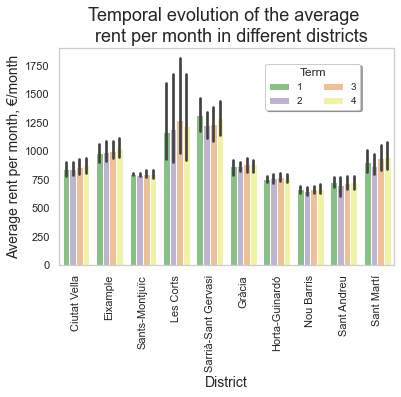

In [27]:
ax=sns.barplot(data=df_permonth,hue='Term', y='Price', x='District_name', palette="Accent")
ax.set_ylabel("Average rent per month, €/month", fontsize = 14)
ax.set_xlabel("District", fontsize = 14)
plt.title('Temporal evolution of the average \n' + r'  rent per month in different districts', fontsize = 18)
plt.legend(bbox_to_anchor=(0.6, 0.95),
          ncol=2, fancybox=True, shadow=True, title='Term', fontsize = 10)
ax.grid(False)
plt.xticks(rotation=90, ha='center')
fig.savefig('Boxplot_neighborhood_temporal.png',bbox_inches='tight')

# Additional visualizations

## Regression plot

We may want to know, if living in a district with a higher price per square meter, implies to pay a higher rent per month. The graph below indicates as the price per square meter increases, the rent per month increases as well. 

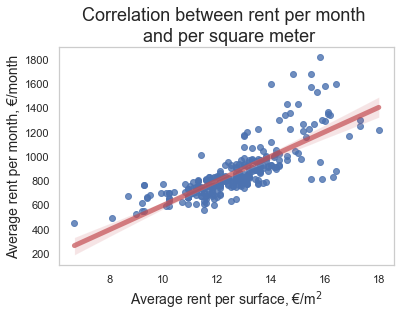

In [28]:
ax=sns.regplot(y=df_permonth["Price"], x=df_persurface["Price"], line_kws={"color":"r","alpha":0.7,"lw":5})
ax.set_ylabel("Average rent per month, €/month", fontsize = 14)
ax.set_xlabel("Average rent per surface, €/m$^2$", fontsize = 14)
plt.title('Correlation between rent per month \n' + r' and per square meter', fontsize = 18)
ax.grid(False)
fig.savefig('Correlation_monthvssquare.png',bbox_inches='tight')
plt.show()

## Q-Q plot

One of the most widely plots to explore if a given distribution follows a normal distribution is the *Q-Q plot*, or graph of theoretical quantile.  These graphs compare the quantiles of our target distribution, with the theoretical quantiles of a normal distribution with the same mean and standard desviation of our data. As more alike our data is to a normal distribution, the points around the line will get more straight. 

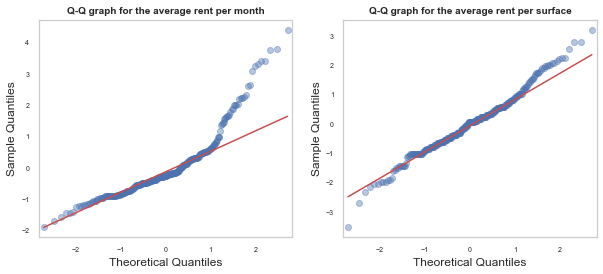

In [29]:
import statsmodels.api as sm

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    df_permonth.Price,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Q-Q graph for the average rent per month', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    df_persurface.Price,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Q-Q graph for the average rent per surface', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)
axs[0].grid(False)
axs[1].grid(False)
fig.savefig('QQplot.png',bbox_inches='tight')

The *Q-Q* plot of the average rent per month does not follow completely a normal distribution, which could already been guessed from the distribution plot, while the average rent per surface is very likely to follow a normal distribution. 

# Conclusion

We have prepared and cleaned a dataset about the rents in Barcelona during 2021. By means of different visualizations, we may conclude that the average rent per month was about 900€/month and a price per square meter of 13 €/m$^2$, being however these values higher in *Sarria-Sant Gervasi*. On the other hand, the rents decreased during the second term, but recovered during the rest of the year. 